## LAB 4 - MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY

Confusion Matrix:
[[51  3]
 [ 2 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



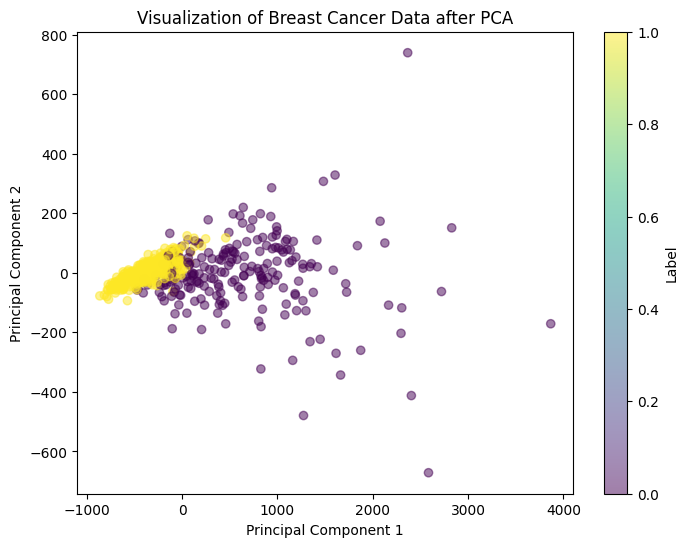

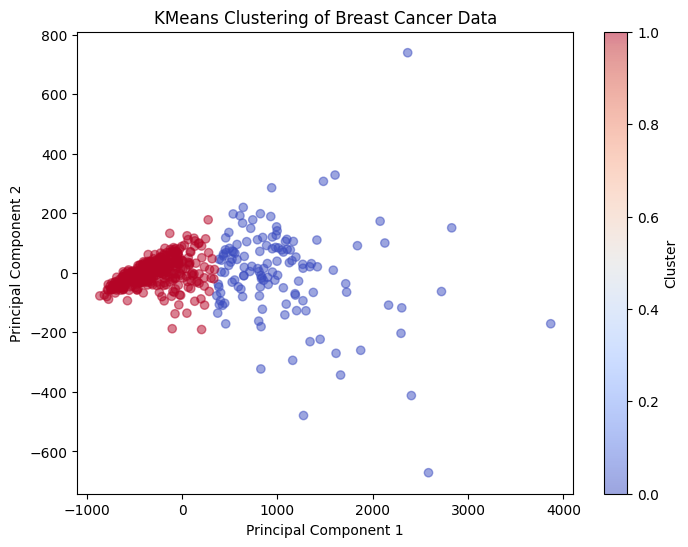

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# Tải dữ liệu
data = load_breast_cancer()
X = data.data
y = data.target

# Chia tập dữ liệu thành tập huấn luyện 75% và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Xây dựng mô hình và huấn luyện
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Trực quan hóa dữ liệu
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Breast Cancer Data after PCA')
plt.colorbar(label='Label')
plt.show()
# Phân cụm
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
# Nhóm các đối tượng có đặc điểm tương đồng mà không cần gắn nhãn
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering of Breast Cancer Data')
plt.colorbar(label='Cluster')
plt.show()



Heart Disease Prediction Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



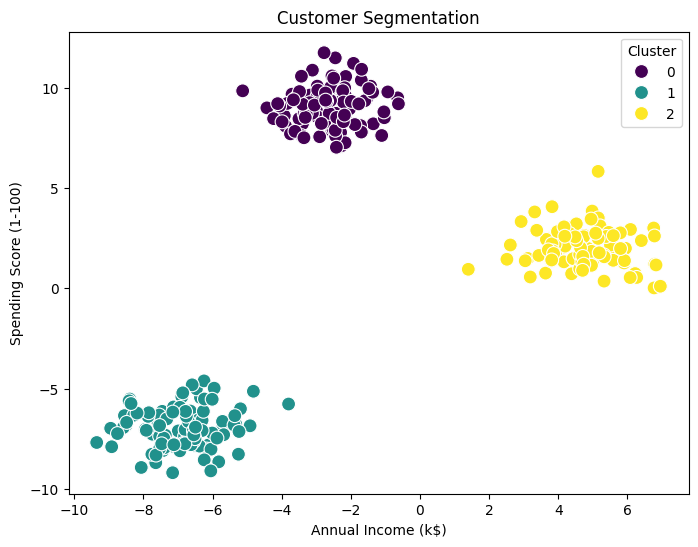

In [ ]:
#1. Cho tập dữ liệu dự đoán bệnh tim bằng hồi quy logistic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn import datasets
# ---------------- Part 1: Heart Disease Prediction ----------------
# Load dataset
dataset = datasets.load_breast_cancer()
df_heart = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df_heart['target'] = dataset.target

# Splitting features and target
X = df_heart.drop(columns=['target'])  # Assuming 'target' is the label column
y = df_heart['target']

# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Heart Disease Prediction Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
# ---------------- Part 2: Customer Segmentation using K-Means ----------------
# Load customer data
dataset_customers = datasets.make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
df_customers = pd.DataFrame(data=dataset_customers[0], columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Standardizing Data
X_customers_scaled = scaler.fit_transform(df_customers)

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_customers['Cluster'] = kmeans.fit_predict(X_customers_scaled)

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_customers['Annual Income (k$)'], y=df_customers['Spending Score (1-100)'], 
                hue=df_customers['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
#3. Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn


In [ ]:
#Sử dụng data Iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

iris=datasets.load_iris()
X=iris.data #Có 4 đặc trưng
y=iris.target #nhãn để so sánh

#Áp dụng kMean với số cụm là 3

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
y_Kmeans=kmeans.predict(X)
print(y_Kmeans)
#Sử dụng PCA để giảm chiều(Giải thích ở BTVN)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
print(X_pca)
#PCA là phép phân tích thành phần chính là một thuật toán thống kể sử dụng phép biến đổi trực giao để biến đổi một tập hợp dữ liệu từ một không gian nhiều chiều sang một không gian ít chiều hơn nhằm tối ưu hóa việc thể hiện sự biến thiên của dữ liệu

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14